In [17]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from utilities import *
import aiohttp
import time
import requests, os, time, random
from News.ip_rotator import ApiGateway
import creds
from binanceVision import BinanceDownloader
from bs4 import BeautifulSoup
import json

In [18]:
'''  
대부분의 경우 5~10% 퍼센트로 회귀한다.
주로 9~14일 사이에 일어난다
'''

'  \n대부분의 경우 5~10% 퍼센트로 회귀한다.\n주로 9~14일 사이에 일어난다\n'

In [28]:
'''  
Manually removed KRW Listings
'''

from pandas import Timestamp
btc_event_list  = [{'exchange': 'upbit',
  'tickers': ['SOL', 'GAS', 'NEO', 'TT'],
  'date': Timestamp('2024-06-17 09:45:15+0000', tz='UTC'),
  'title': '가스(GAS), 게임빌드(GAME2), 네오(NEO), 솔라나(SOL), 썬더코어(TT) BTC, USDT 마켓 디지털 자산 추가 (업데이트)'},
 {'exchange': 'upbit',
  'tickers': ['OAS'],
  'date': Timestamp('2024-05-23 02:52:31+0000', tz='UTC'),
  'title': '오아시스(OAS) 신규 거래지원 안내 (BTC, USDT 마켓)'},
 {'exchange': 'upbit',
  'tickers': ['OMNI'],
  'date': Timestamp('2024-05-03 05:36:10+0000', tz='UTC'),
  'title': '제타체인(ZETA), 옴니네트워크(OMNI) 신규 거래지원 안내 (KRW, BTC, USDT 마켓)'},
 {'exchange': 'upbit',
  'tickers': ['BIGTIME'],
  'date': Timestamp('2024-04-23 05:32:10+0000', tz='UTC'),
  'title': '빅타임(BIGTIME), 아카시네트워크(AKT) 신규 거래지원 안내 (KRW, BTC, USDT 마켓) (AKT 거래지원 개시 시점 연기 안내)'},
 {'exchange': 'upbit',
  'tickers': ['POKT'],
  'date': Timestamp('2024-03-27 05:13:24+0000', tz='UTC'),
  'title': 'KRW, BTC, USDT 마켓 디지털 자산 추가 (MNT, POKT) (POKT 거래지원 개시 시점 연기 안내)'},
 {'exchange': 'upbit',
  'tickers': ['ALT'],
  'date': Timestamp('2024-02-27 02:45:08+0000', tz='UTC'),
  'title': 'KRW, BTC 마켓 디지털 자산 추가 (ALT, PYTH)'},
 {'exchange': 'upbit',
  'tickers': ['SPURS'],
  'date': Timestamp('2023-12-20 01:40:02+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (SPURS)'},
 {'exchange': 'upbit',
  'tickers': ['AXL'],
  'date': Timestamp('2023-12-07 05:05:02+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (AXL)'},
 {'exchange': 'upbit',
  'tickers': ['ID'],
  'date': Timestamp('2023-11-30 05:00:00+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (ID)'},
 {'exchange': 'upbit',
  'tickers': ['GLMR'],
  'date': Timestamp('2023-09-25 05:00:08+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (GLMR) (GLMR 출금 수수료 일시 상향 안내)'},
 {'exchange': 'upbit',
  'tickers': ['CYBER'],
  'date': Timestamp('2023-08-22 00:20:02+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (CYBER)'},
 {'exchange': 'upbit',
  'tickers': ['STG'],
  'date': Timestamp('2023-08-10 00:10:00+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (STG)'},
 {'exchange': 'upbit',
  'tickers': ['MINA'],
  'date': Timestamp('2023-07-11 00:00:02+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (MINA)'},
 {'exchange': 'upbit',
  'tickers': ['MAGIC'],
  'date': Timestamp('2023-03-21 00:51:45+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (MAGIC)'},
 {'exchange': 'upbit',
  'tickers': ['ACS'],
  'date': Timestamp('2023-03-07 00:30:08+0000', tz='UTC'),
  'title': 'KRW, BTC 마켓 디지털 자산 추가 (MASK, ACS)'},
 {'exchange': 'upbit',
  'tickers': ['BLUR'],
  'date': Timestamp('2023-02-16 01:20:04+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (BLUR)'},
 {'exchange': 'upbit',
  'tickers': ['ASTR'],
  'date': Timestamp('2023-02-09 00:00:05+0000', tz='UTC'),
  'title': 'BTC 마켓 디지털 자산 추가 (ASTR) (거래지원 개시 시점 연기 안내)'},
 {'exchange': 'upbit',
  'tickers': ['GAL'],
  'date': Timestamp('2023-01-18 01:00:16+0000', tz='UTC'),
  'title': 'KRW, BTC 마켓 디지털 자산 추가 (SHIB, GAL)'},
#  {'exchange': 'upbit',
#   'tickers': ['NAP', 'INTER', 'ACM', 'ATM', 'BAR', 'AFC', 'CITY'],
#   'date': Timestamp('2023-01-05 01:30:00+0000', tz='UTC'),
#   'title': 'BTC 마켓 디지털 자산 추가 (ACM, AFC, ATM, BAR, CITY, INTER, NAP) (거래지원 관련 재안내)'},
#  {'exchange': 'upbit',
#   'tickers': ['RAY'],
#   'date': Timestamp('2022-07-14 01:25:01+0000', tz='UTC'),
#   'title': 'BTC 마켓 디지털 자산 추가 (RAY) (출금 서비스 개시 안내)'},
#  {'exchange': 'upbit',
#   'tickers': ['APE'],
#   'date': Timestamp('2022-05-17 01:32:28+0000', tz='UTC'),
#   'title': 'BTC 마켓 디지털 자산 추가 (APE)'},
#  {'exchange': 'upbit',
#   'tickers': ['ENS', 'ARPA'],
#   'date': Timestamp('2022-05-03 01:30:01+0000', tz='UTC'),
#   'title': 'BTC 마켓 디지털 자산 추가 (ARPA, ENS)'},
#  {'exchange': 'upbit',
#   'tickers': ['AGLD'],
#   'date': Timestamp('2022-04-21 01:25:01+0000', tz='UTC'),
#   'title': 'BTC 마켓 디지털 자산 추가 (AGLD, API3)'},
#  {'exchange': 'upbit',
#   'tickers': ['RAD'],
#   'date': Timestamp('2022-04-01 02:32:19+0000', tz='UTC'),
#   'title': 'BTC 마켓 디지털 자산 추가 (RAD)'},
#  {'exchange': 'upbit',
#   'tickers': ['RLY', 'RNDR'],
#   'date': Timestamp('2022-02-16 03:00:01+0000', tz='UTC'),
#   'title': 'BTC 마켓 디지털 자산 추가 (RNDR, RLY)'},
#  {'exchange': 'upbit',
#   'tickers': ['IMX'],
#   'date': Timestamp('2022-02-08 04:00:23+0000', tz='UTC'),
#   'title': 'KRW, BTC 마켓 디지털 자산 추가 (AVAX, IMX) (거래지원 개시 시점 연장 안내)'},
#  {'exchange': 'upbit',
#   'tickers': ['CTC', 'LPT'],
#   'date': Timestamp('2021-12-29 04:50:01+0000', tz='UTC'),
#   'title': 'BTC 마켓 디지털 자산 추가 (CTC, LPT)'},
#  {'exchange': 'upbit',
#   'tickers': ['GTC', 'OCEAN'],
#   'date': Timestamp('2021-12-22 04:00:01+0000', tz='UTC'),
#   'title': 'BTC 마켓 디지털 자산 추가 (GTC, OCEAN)'},
#  {'exchange': 'upbit',
#   'tickers': ['YGG'],
#   'date': Timestamp('2021-12-15 04:00:03+0000', tz='UTC'),
#   'title': 'KRW, BTC 마켓 디지털 자산 추가 (NEAR, YGG)'},

]


In [29]:
event_list = btc_event_list

In [30]:
event_list

[{'exchange': 'upbit',
  'tickers': ['SOL', 'GAS', 'NEO', 'TT'],
  'date': Timestamp('2024-06-17 09:45:15+0000', tz='UTC'),
  'title': '가스(GAS), 게임빌드(GAME2), 네오(NEO), 솔라나(SOL), 썬더코어(TT) BTC, USDT 마켓 디지털 자산 추가 (업데이트)'},
 {'exchange': 'upbit',
  'tickers': ['OAS'],
  'date': Timestamp('2024-05-23 02:52:31+0000', tz='UTC'),
  'title': '오아시스(OAS) 신규 거래지원 안내 (BTC, USDT 마켓)'},
 {'exchange': 'upbit',
  'tickers': ['OMNI'],
  'date': Timestamp('2024-05-03 05:36:10+0000', tz='UTC'),
  'title': '제타체인(ZETA), 옴니네트워크(OMNI) 신규 거래지원 안내 (KRW, BTC, USDT 마켓)'},
 {'exchange': 'upbit',
  'tickers': ['BIGTIME'],
  'date': Timestamp('2024-04-23 05:32:10+0000', tz='UTC'),
  'title': '빅타임(BIGTIME), 아카시네트워크(AKT) 신규 거래지원 안내 (KRW, BTC, USDT 마켓) (AKT 거래지원 개시 시점 연기 안내)'},
 {'exchange': 'upbit',
  'tickers': ['POKT'],
  'date': Timestamp('2024-03-27 05:13:24+0000', tz='UTC'),
  'title': 'KRW, BTC, USDT 마켓 디지털 자산 추가 (MNT, POKT) (POKT 거래지원 개시 시점 연기 안내)'},
 {'exchange': 'upbit',
  'tickers': ['ALT'],
  'date': Timesta

In [31]:
for event in event_list:
    print(event['date'].tz_convert('Asia/Seoul').hour,event['date'].tz_convert('Asia/Seoul').day_name())

18 Monday
11 Thursday
14 Friday
14 Tuesday
14 Wednesday
11 Tuesday
10 Wednesday
14 Thursday
14 Thursday
14 Monday
9 Tuesday
9 Thursday
9 Tuesday
9 Tuesday
9 Tuesday
10 Thursday
9 Thursday
10 Wednesday


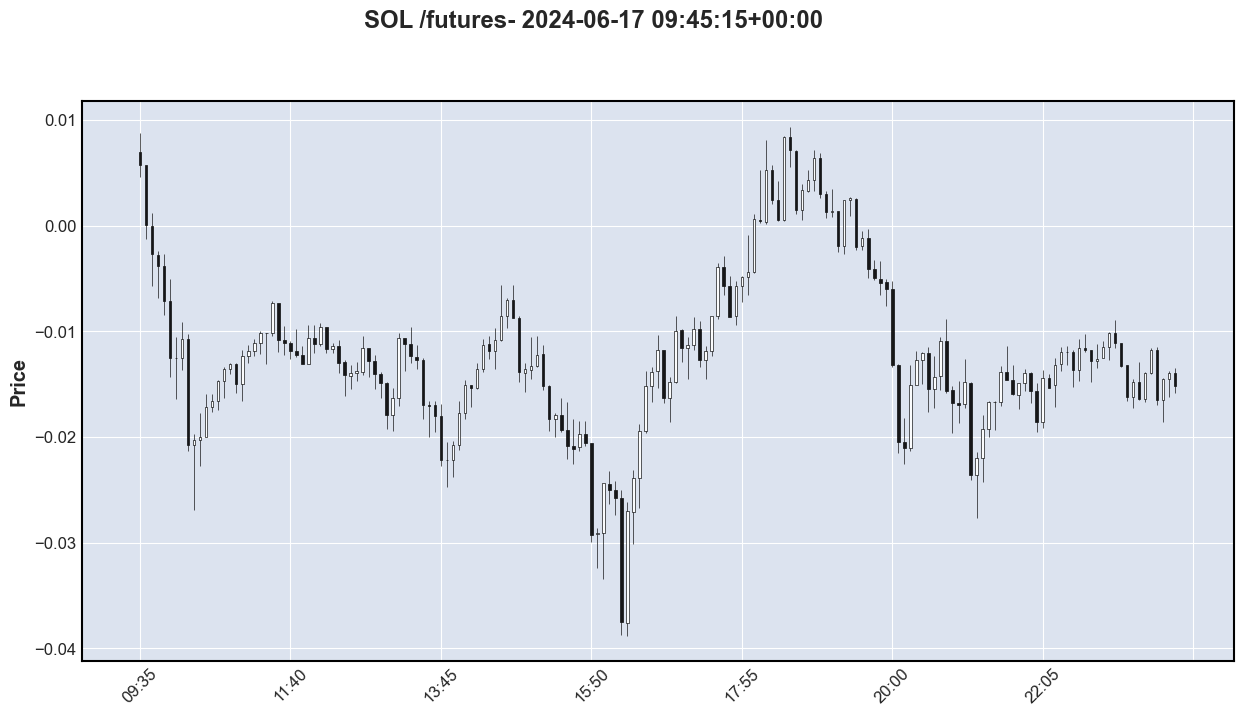

가스(GAS), 게임빌드(GAME2), 네오(NEO), 솔라나(SOL), 썬더코어(TT) BTC, USDT 마켓 디지털 자산 추가 (업데이트)


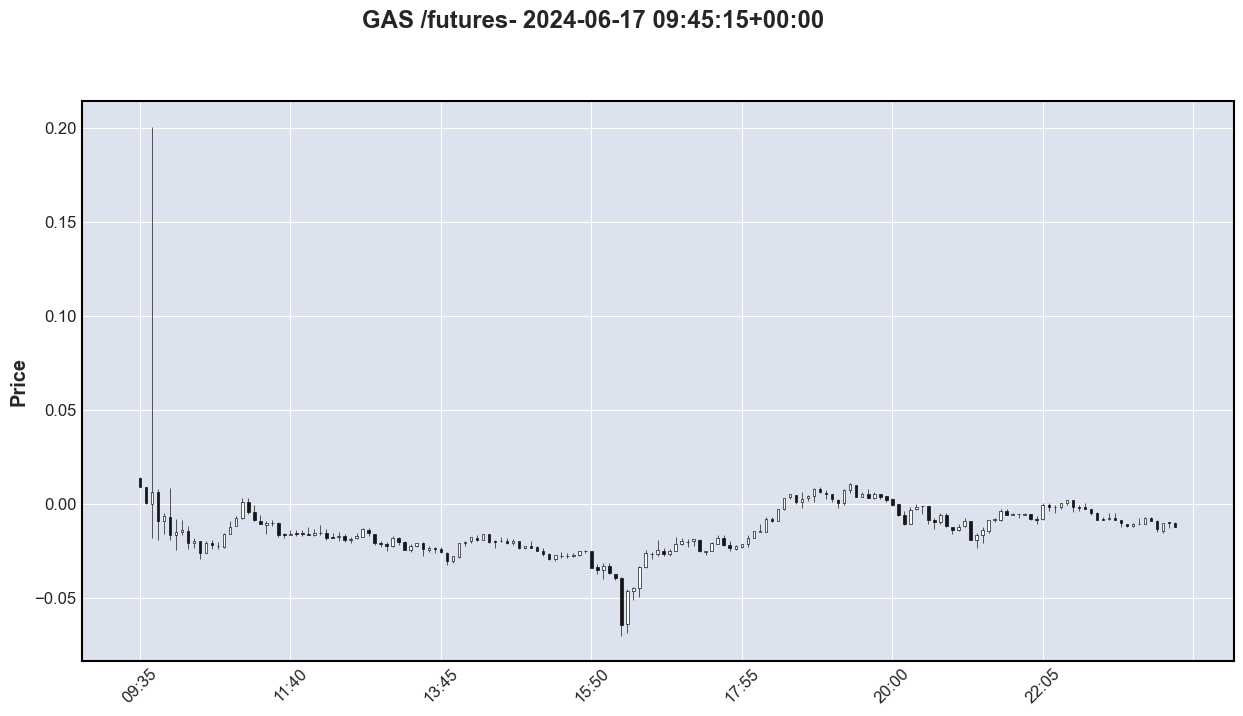

가스(GAS), 게임빌드(GAME2), 네오(NEO), 솔라나(SOL), 썬더코어(TT) BTC, USDT 마켓 디지털 자산 추가 (업데이트)


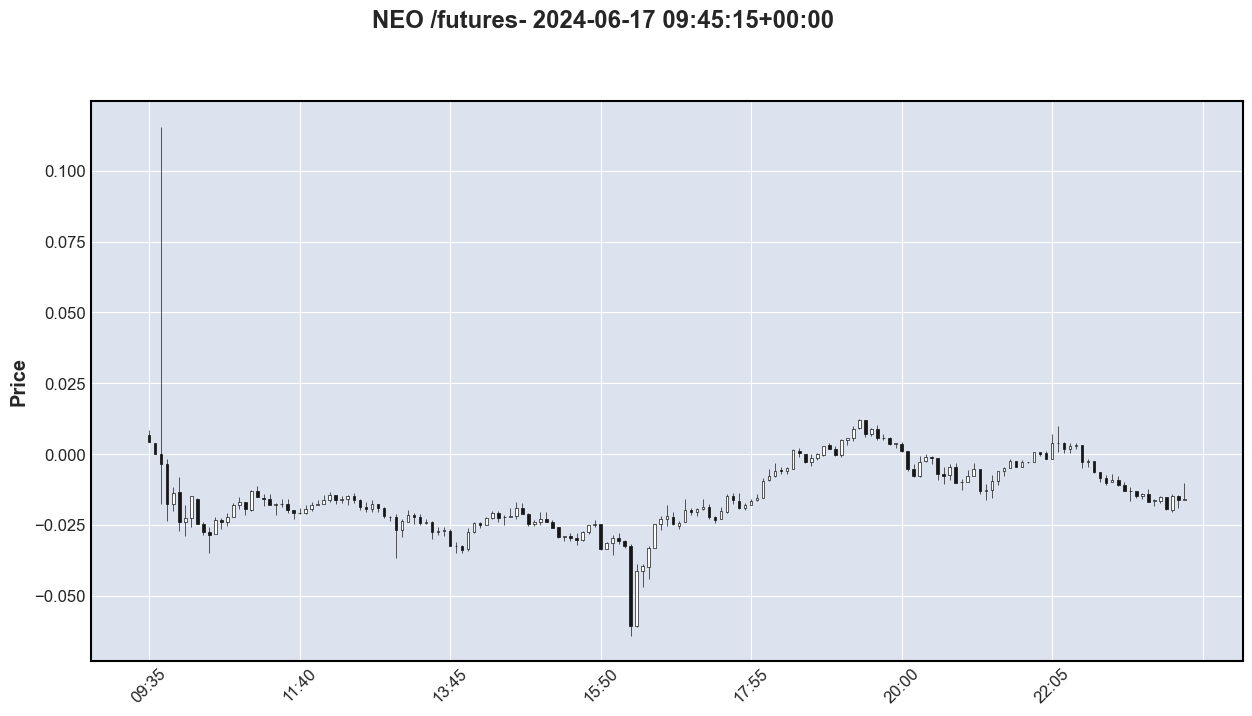

가스(GAS), 게임빌드(GAME2), 네오(NEO), 솔라나(SOL), 썬더코어(TT) BTC, USDT 마켓 디지털 자산 추가 (업데이트)


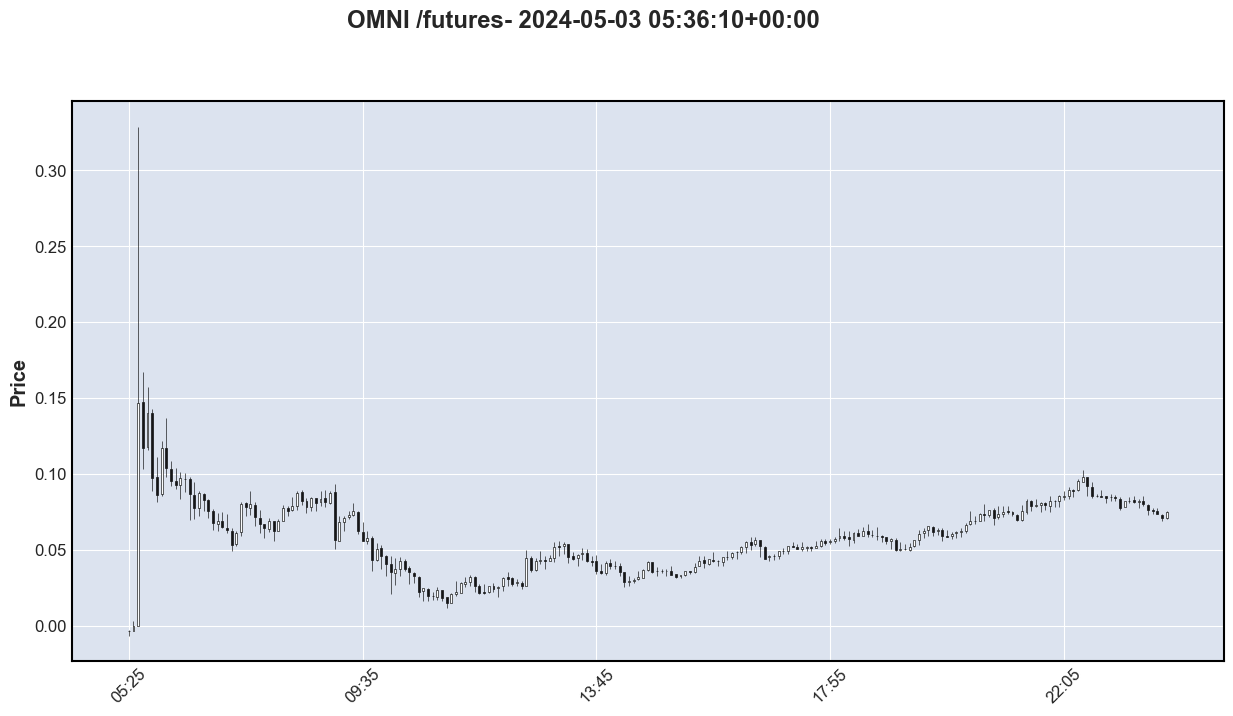

제타체인(ZETA), 옴니네트워크(OMNI) 신규 거래지원 안내 (KRW, BTC, USDT 마켓)


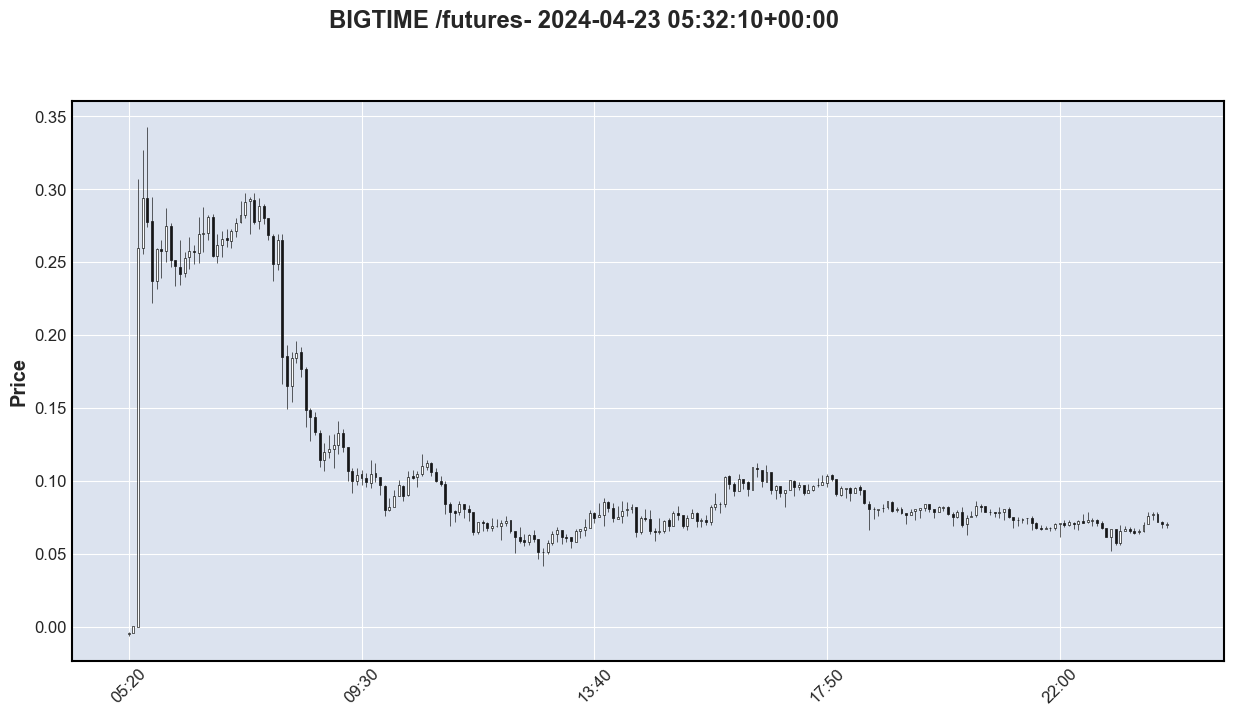

빅타임(BIGTIME), 아카시네트워크(AKT) 신규 거래지원 안내 (KRW, BTC, USDT 마켓) (AKT 거래지원 개시 시점 연기 안내)


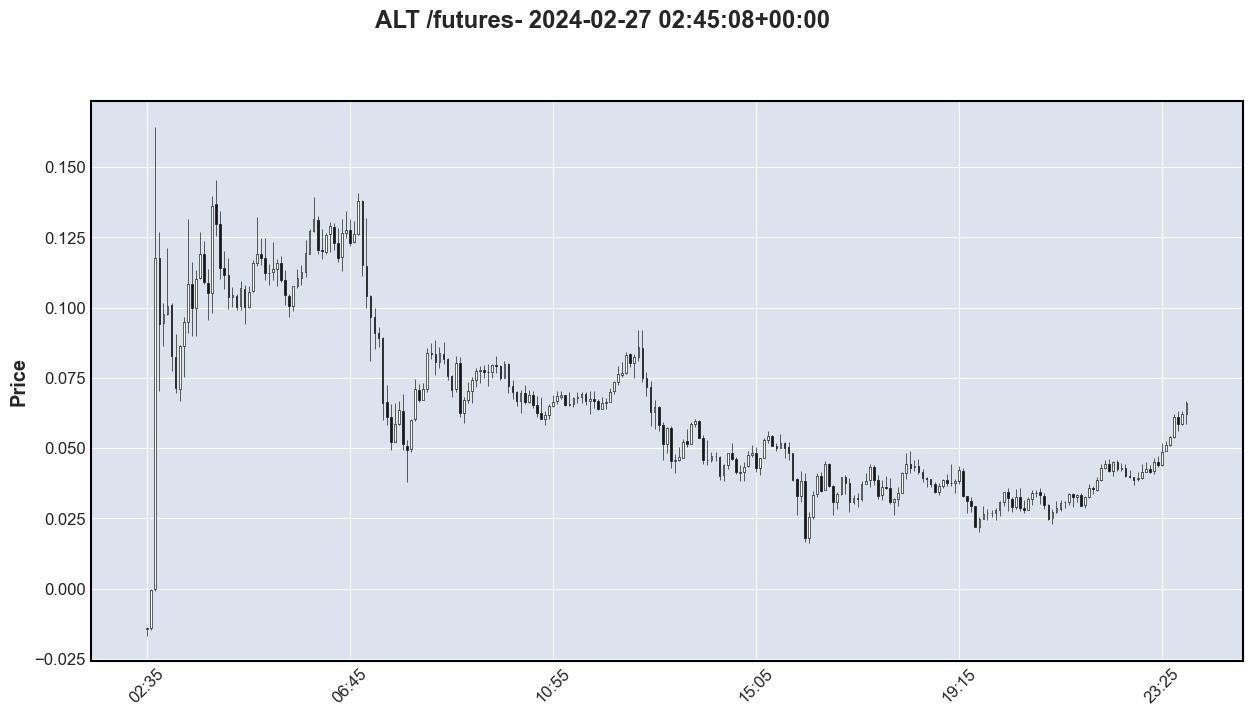

KRW, BTC 마켓 디지털 자산 추가 (ALT, PYTH)


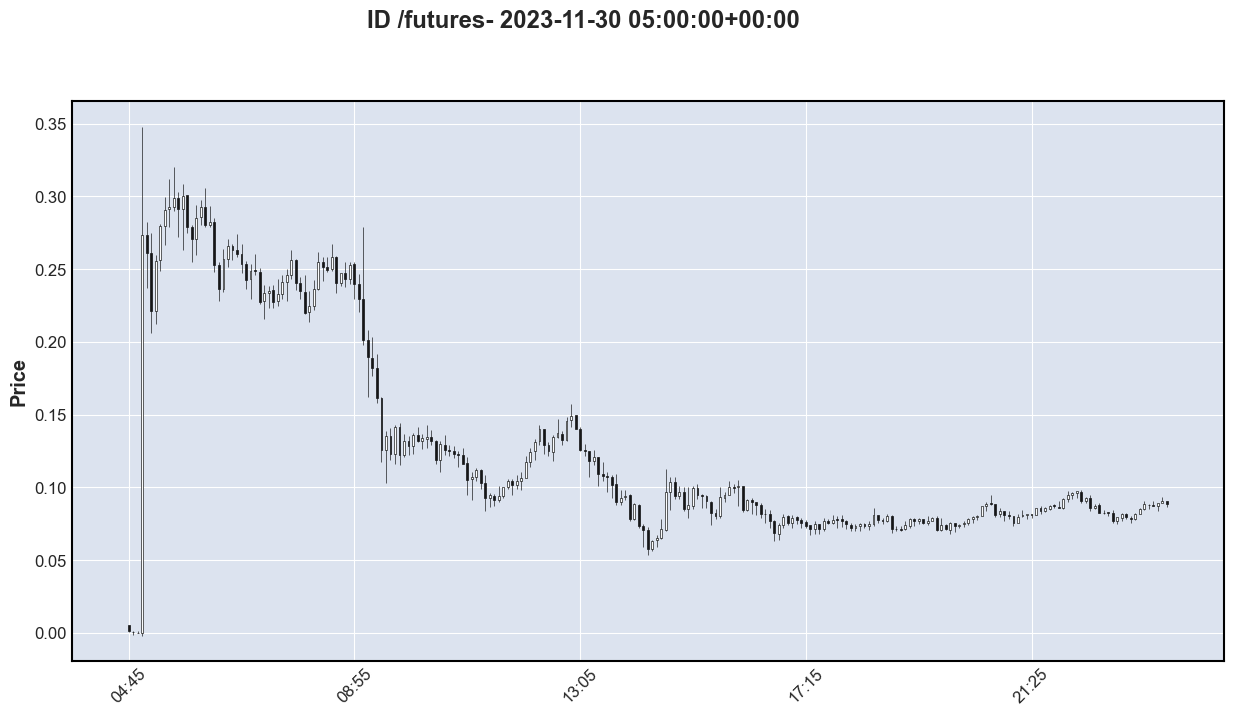

BTC 마켓 디지털 자산 추가 (ID)


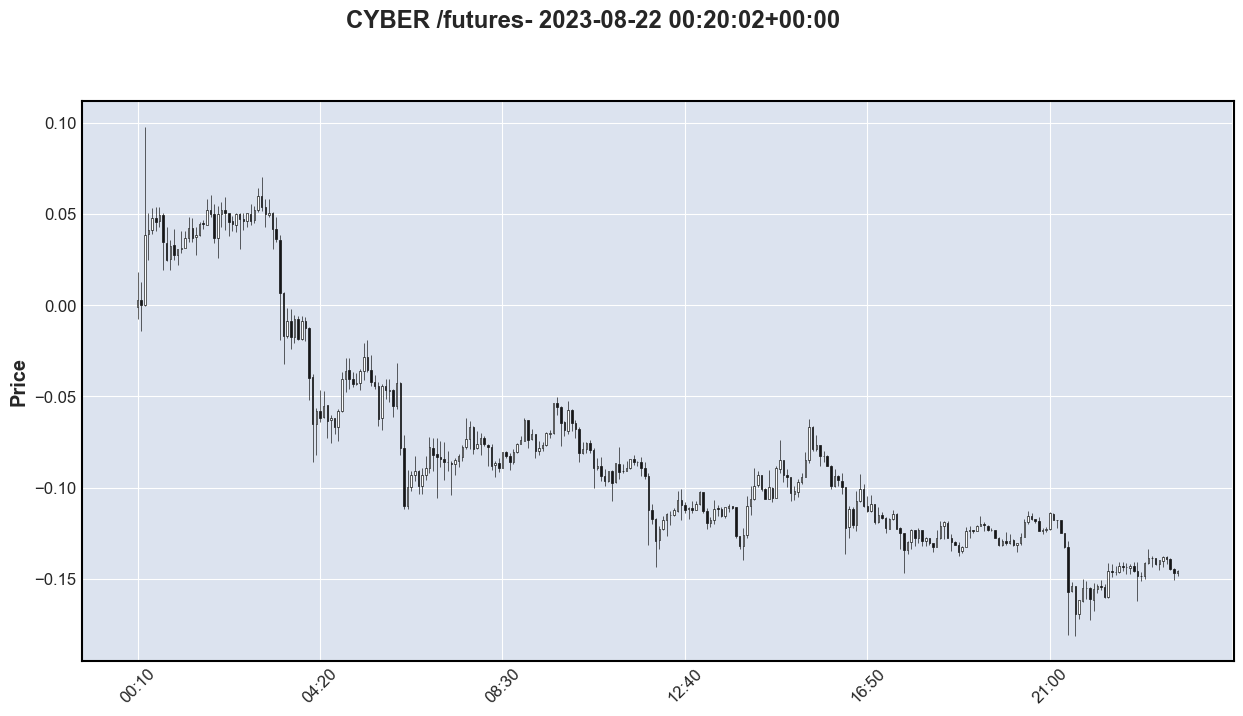

BTC 마켓 디지털 자산 추가 (CYBER)


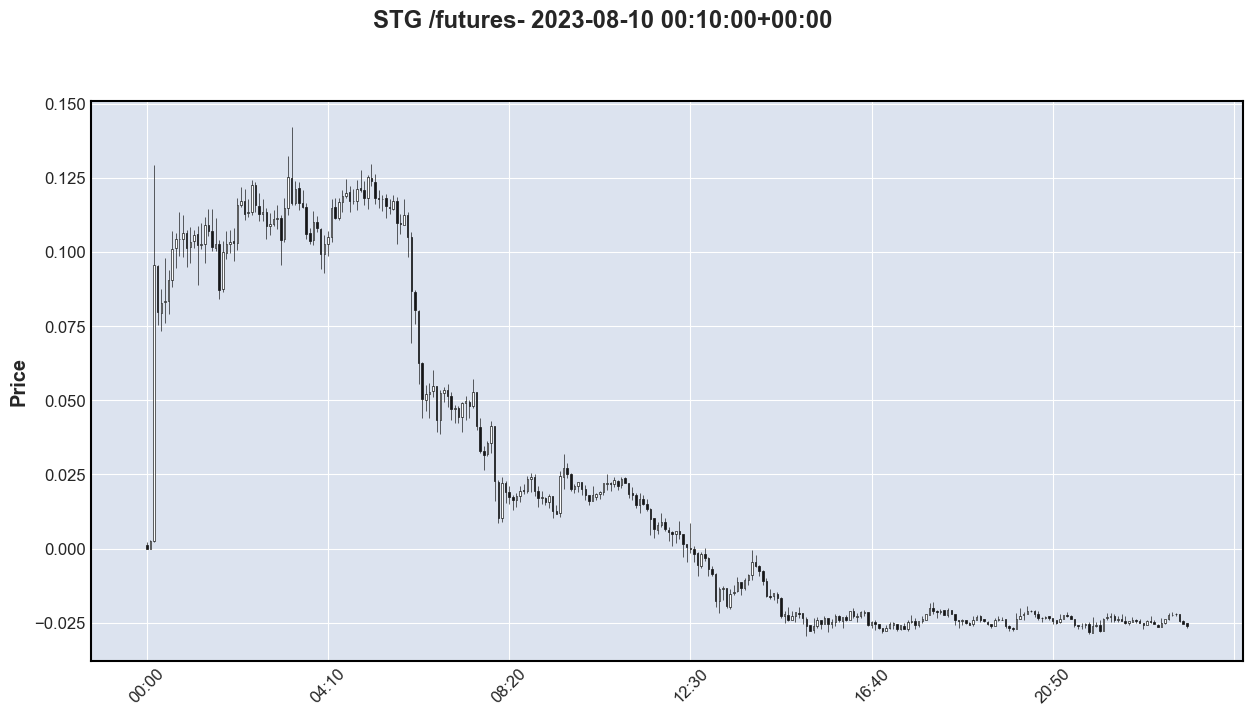

BTC 마켓 디지털 자산 추가 (STG)


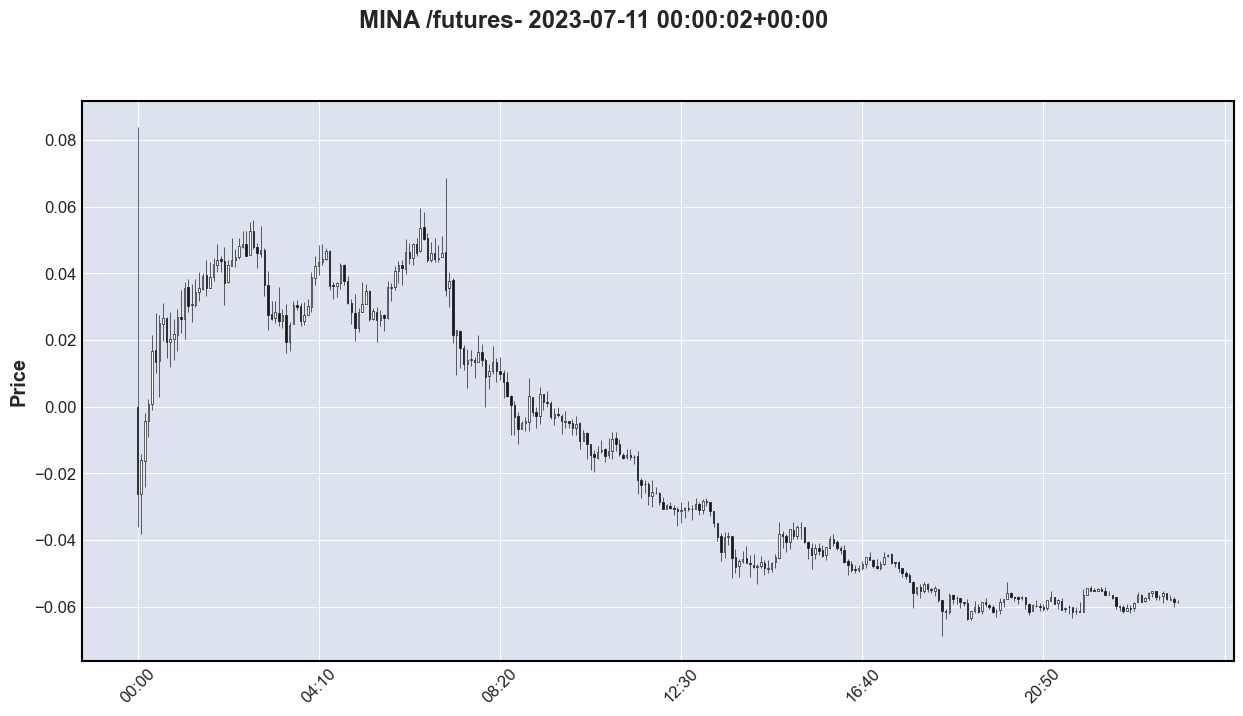

BTC 마켓 디지털 자산 추가 (MINA)


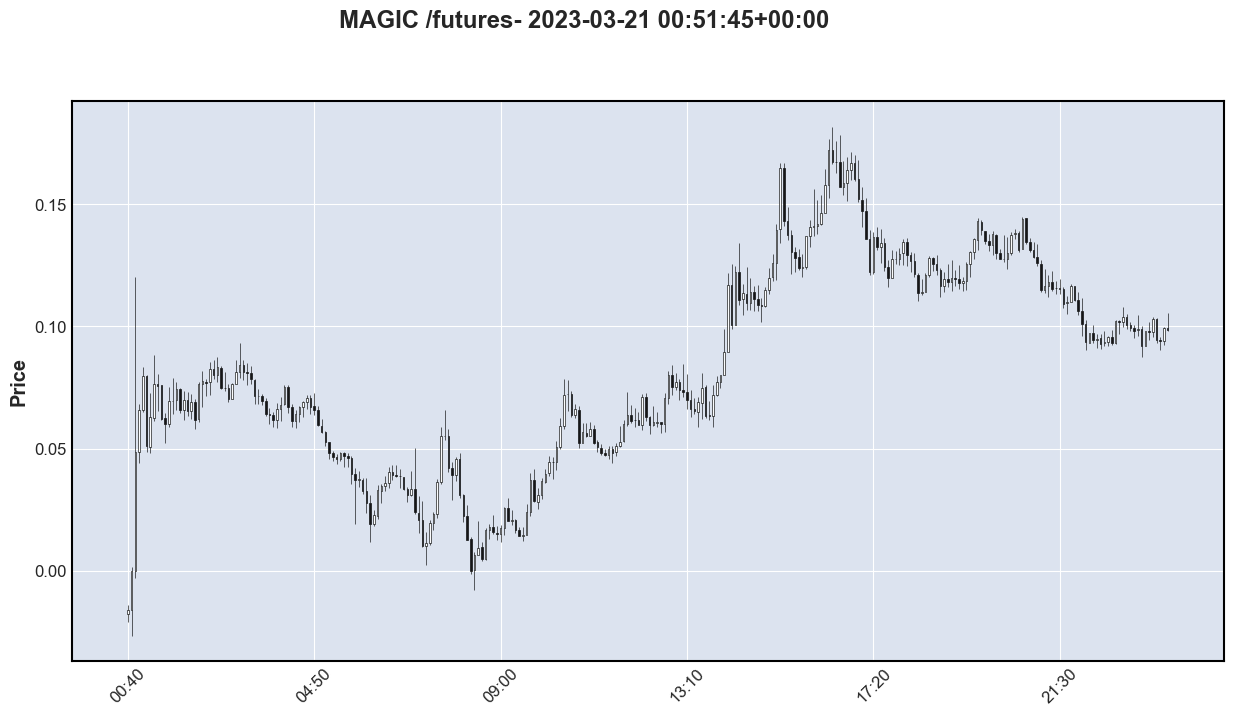

BTC 마켓 디지털 자산 추가 (MAGIC)


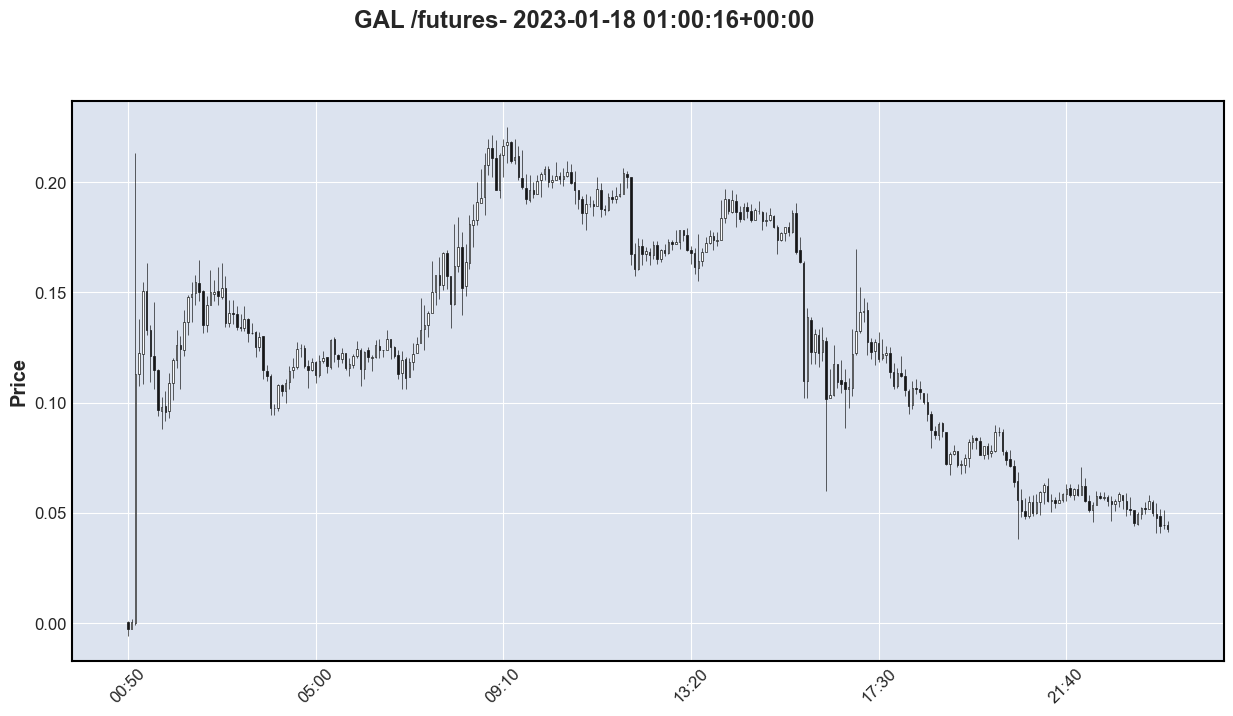

KRW, BTC 마켓 디지털 자산 추가 (SHIB, GAL)


In [32]:
from binanceVision import BinanceDownloader
import mplfinance as mpf
from News.util import get_cmc_marketcap
bd = BinanceDownloader()
numDays = 1
tf = '5m'

df_result = []
for event in event_list:
    time0 = event['date']
    for ticker in event['tickers']:
        asset_type = None
        result = {'ticker':ticker, 'date': time0,}
        
        try:
            # Data Retrieval
            symbol = (ticker+'USDT')
            df_ohlcv = pd.DataFrame()
            for n in np.arange(0,numDays):
                date = time0 + pd.Timedelta(days = n)
                df_ohlcv = pd.concat([df_ohlcv,bd.get_ohlcv_daily_(ticker = symbol, date = date.strftime("%Y-%m-%d"), timeframe = tf, type='futures')], axis=0)
                asset_type = 'futures'
        except:
            try:
                symbol = ("1000"+ticker+'USDT')
                df_ohlcv = pd.DataFrame()
                for n in np.arange(0,numDays):
                    date = time0 + pd.Timedelta(days = n)
                    df_ohlcv = pd.concat([df_ohlcv,bd.get_ohlcv_daily_(ticker = symbol, date = date.strftime("%Y-%m-%d"), timeframe = tf, type='futures')], axis=0)
                    asset_type = 'futures'                
            except:
                try:
                    continue
                    # symbol = (ticker+'USDT')
                    # df_ohlcv = pd.DataFrame()
                    # for n in np.arange(0,numDays):
                    #     date = time0 + pd.Timedelta(days = n)
                    #     df_ohlcv = pd.concat([df_ohlcv,bd.get_ohlcv_daily_(ticker = symbol, date = date.strftime("%Y-%m-%d"), timeframe = tf, type='spot')], axis=0)
                    #     asset_type = 'spot'                
                except:
                    continue


        df_ohlcv.Time = pd.to_datetime(df_ohlcv.Time, unit='ms', utc=True)
        df_ohlcv.set_index('Time', inplace=True)
        result['type'] = asset_type

        t0 = np.searchsorted(df_ohlcv.index, time0)
        t0 = df_ohlcv.index[t0 - 1]

        df_ohlcv = (df_ohlcv/df_ohlcv.Open[t0]-1)
        # df_ohlcv = df_ohlcv[t0-pd.Timedelta(minutes=10):t0+pd.Timedelta(minutes=120)]
        df_ohlcv = df_ohlcv[t0-pd.Timedelta(minutes=10):]

        # marketcap = round(await get_cmc_marketcap(ticker, time0),0)
        # if (marketcap is not None) and (marketcap > 100) & (marketcap < 600):
        try:
            # Configuration for the vertical line on the candlestick chart
            vlines = {
                'vlines': [time0], 
                'colors': ['y'], 
                'linewidths': [1],
                'linestyle':'-.',
                'alpha': 0,
            }
            # Plot the candlestick chart with the vertical line on the same plot
            # mpf.plot(df_ohlcv, type='candle', figsize=(16, 8), title=f"{ticker} / MarketCap($m): {marketcap} {asset_type}- {time0}", vlines=vlines)
            mpf.plot(df_ohlcv, type='candle', figsize=(16, 8), title=f"{ticker} /{asset_type}- {time0}", vlines=vlines)

            plt.show()
            print(event['title'])
        except Exception as e:
            print(ticker, str(e))
            continue
        






In [ ]:
import binanceVision
bd = BinanceDownloader()
side = 'long'
df_result = []
for event in event_list:
    time0 = event['date']
    for ticker in event['tickers']:
        asset_type = None
        result = {'ticker':ticker, 'date': time0,}
        try:
            # Data Retrieval
            df_ohlcv = pd.DataFrame()
            
            for n in [0,1,2,3]:
                date = time0 + pd.Timedelta(days = n)
                try:
                    df_ohlcv = pd.concat([df_ohlcv,bd.get_ohlcv_daily_(ticker = (ticker+'USDT'), date = date.strftime("%Y-%m-%d"), timeframe = '1m', type='futures')], axis=0)
                    asset_type = 'futures'
                except:
                    df_ohlcv = pd.concat([df_ohlcv,bd.get_ohlcv_daily_(ticker = (ticker+'USDT'), date = date.strftime("%Y-%m-%d"), timeframe = '1m', type='spot')], axis=0)
                    asset_type = 'spot'
            df_ohlcv.Time = pd.to_datetime(df_ohlcv.Time, unit='ms', utc=True)
            df_ohlcv.set_index('Time', inplace=True)
            result['type'] = asset_type

            t0 = np.searchsorted(df_ohlcv.index, time0)
            t0 = df_ohlcv.index[t0-1]

            # Return Calculation
            for n_hours in [1, 3, 6, 12, 24, 48, 72]:
                t1 = t0 + pd.Timedelta(hours = n_hours)
                t1 = np.searchsorted(df_ohlcv.index, t1)
                t1 = df_ohlcv.index[t1]

                if side == 'short':
                    returns = 1 - df_ohlcv.Open[t1]/df_ohlcv.Open[t0]
                else:
                    returns = df_ohlcv.Open[t1]/df_ohlcv.Open[t0] - 1

                result[f'rets_{n_hours}h'] = returns


            # Volume Calculation
            if asset_type is not None:
                date = time0 - pd.DateOffset(months=1)
                if asset_type == 'futures':
                    df_ohlcv = bd.get_ohlcv_monthly_(ticker = (ticker+'USDT'), date = date.strftime("%Y-%m"), timeframe = '1d', type= 'futures')
                    avg_dollar_volume = (df_ohlcv.Volume*(df_ohlcv.Open+df_ohlcv.Close)/2).mean()
                    result['futures_volume'] = avg_dollar_volume
                
                df_ohlcv = bd.get_ohlcv_monthly_(ticker = (ticker+'USDT'), date = date.strftime("%Y-%m"), timeframe = '1d', type= 'spot')
                avg_dollar_volume = (df_ohlcv.Volume*(df_ohlcv.Open+df_ohlcv.Close)/2).mean()
                result['spot_volume'] = avg_dollar_volume

        except:
            pass

        df_result.append(result)
pd.DataFrame(df_result)


,ticker,date,type,rets_1h,rets_3h,rets_6h,rets_12h,rets_24h,rets_48h,rets_72h,futures_volume,spot_volume
0,JUP,2024-07-04 06:42:18+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BLAST,2024-06-24 09:23:05+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ZRO,2024-06-20 06:02:42+00:00,futures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ONDO,2024-06-14 03:06:53+00:00,futures,0.054396,0.063986,0.054477,-0.033766,-0.033685,-0.030220,-0.086631,1.878198e+08,NaN
4,TAIKO,2024-06-05 09:34:51+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
56,SPND,2020-07-30 07:30:36+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,AHT,2020-07-27 07:20:35+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,HIVE,2020-07-21 07:10:45+00:00,spot,0.138122,0.095304,0.110958,0.084254,0.076427,0.040976,0.044199,NaN,734575.569752
59,DKA,2020-07-14 06:51:27+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_result = pd.DataFrame(df_result)

In [9]:
df_result = df_result[~pd.isna(df_result['type'])]

In [10]:
df_result

,ticker,date,type,rets_1h,rets_3h,rets_6h,rets_12h,rets_24h,rets_48h,rets_72h,futures_volume,spot_volume
2,ZRO,2024-06-20 06:02:42+00:00,futures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ONDO,2024-06-14 03:06:53+00:00,futures,0.054396,0.063986,0.054477,-0.033766,-0.033685,-0.030220,-0.086631,1.878198e+08,NaN
6,STG,2024-05-30 07:29:55+00:00,futures,0.468362,0.591191,0.569479,0.424524,0.418941,0.453267,0.480356,1.559261e+07,6.452921e+06
7,AUCTION,2024-05-29 09:15:13+00:00,futures,0.392295,0.472567,0.359442,0.350659,0.338874,0.324643,0.302518,2.624662e+07,8.446951e+06
9,ZETA,2024-05-03 05:36:10+00:00,futures,0.268531,0.332232,0.154411,0.158227,0.146118,0.218846,0.350139,2.599403e+07,NaN
10,OMNI,2024-05-03 05:36:10+00:00,futures,0.093750,0.081689,0.027961,0.050987,0.065789,0.020285,0.054276,1.535798e+08,4.652337e+07
11,BIGTIME,2024-04-23 05:32:10+00:00,futures,0.250251,0.153460,0.073721,0.092778,0.075226,-0.022066,0.028586,1.117940e+08,NaN
15,PYTH,2024-02-27 02:45:08+00:00,futures,0.221227,0.255390,0.292869,0.164179,0.143118,0.092869,0.094693,7.770347e+07,NaN
16,ALT,2024-02-27 02:45:08+00:00,futures,0.119166,0.110697,0.081802,0.041170,0.055159,-0.026723,-0.043083,5.544117e+08,1.917857e+08
17,ID,2024-02-07 04:13:10+00:00,futures,0.526484,0.608247,0.642375,0.711696,0.827586,1.210807,1.291148,2.650580e+07,9.974635e+06


In [6]:
# Ticker

import binanceVision


bd = BinanceDownloader()
side = 'long'
df_result = []
for event in event_list:
    time0 = event['date']
    for ticker in event['tickers']:
        asset_type = None
        result = {'ticker':ticker, 'date': time0,}
        try:
            # Data Retrieval
            date = time0
            try:
                df_trades = bd.get_trades_(ticker = (ticker+'USDT'),date = date.strftime("%Y-%m-%d"), aggTrades = True, freq='daily', type = 'futures')
                asset_type = 'futures'
            except:
                try:
                    df_trades = bd.get_trades_(ticker = (ticker+'USDT'),date = date.strftime("%Y-%m-%d"), aggTrades = True, freq='daily', type = 'spot')
                    asset_type = 'spot'
                except:
                    continue
            df_trades.transact_time = pd.to_datetime(df_trades.transact_time, unit='ms', utc=True)
            df_trades.set_index('transact_time', inplace=True)
            result['type'] = asset_type

            t0 = np.searchsorted(df_trades.index, time0)
            t0 = df_trades.index[t0-1]
            start_price = df_trades.price[t0]
            if not isinstance(start_price, float):
                start_price = start_price.iloc[-1]

            # Return Calculation
            for n_seconds in [5, 10, 30, 60, 60*2, 60*5]:
                t1 = t0 + pd.Timedelta(seconds = n_seconds)
                t1 = np.searchsorted(df_trades.index, t1)
                t1 = df_trades.index[t1]
                
                end_price = df_trades.price[t1]

                if not isinstance(end_price, float):
                    end_price = end_price.iloc[-1]    

                if side == 'short':
                    returns = 1 -  end_price / start_price
                else:
                    returns = end_price / start_price - 1

                result[f'rets_{n_seconds}s'] = returns                

            # # Volume Calculation
            # if asset_type is not None:
            #     date = time0 - pd.DateOffset(months=1)
            #     if asset_type == 'futures':
            #         df_ohlcv = bd.get_ohlcv_monthly_(ticker = (ticker+'USDT'), date = date.strftime("%Y-%m"), timeframe = '1d', type= 'futures')
            #         avg_dollar_volume = (df_ohlcv.Volume*(df_ohlcv.Open+df_ohlcv.Close)/2).mean()
            #         result['futures_volume'] = avg_dollar_volume
                
            #     df_ohlcv = bd.get_ohlcv_monthly_(ticker = (ticker+'USDT'), date = date.strftime("%Y-%m"), timeframe = '1d', type= 'spot')
            #     avg_dollar_volume = (df_ohlcv.Volume*(df_ohlcv.Open+df_ohlcv.Close)/2).mean()
            #     result['spot_volume'] = avg_dollar_volume

        except:
            pass

        df_result.append(result)
pd.DataFrame(df_result)

,ticker,date,type,rets_5s,rets_10s,rets_30s,rets_60s,rets_120s,rets_300s
0,JUP,2024-07-04 06:42:18+00:00,futures,0.221377,0.147852,0.134641,0.093408,0.071924,0.063384
1,ZRO,2024-06-20 06:02:42+00:00,futures,NaN,NaN,NaN,NaN,NaN,NaN
2,ONDO,2024-06-14 03:06:53+00:00,futures,0.144043,0.140015,0.122533,0.100862,0.069604,0.074921
3,STG,2024-05-30 07:29:55+00:00,futures,0.000620,0.000620,0.000620,0.342639,0.398677,0.308106
4,AUCTION,2024-05-29 09:15:13+00:00,futures,0.310947,0.323233,0.387947,0.377106,0.453605,0.450826
5,ZETA,2024-05-03 05:36:10+00:00,futures,0.258811,0.202717,0.201248,0.331424,0.313069,0.251101
6,OMNI,2024-05-03 05:36:10+00:00,futures,0.147945,0.234521,0.294795,0.193973,0.143014,0.163836
7,BIGTIME,2024-04-23 05:32:10+00:00,futures,0.002005,0.004010,0.085714,0.233083,0.264160,0.293734
8,PYTH,2024-02-27 02:45:08+00:00,futures,0.074756,0.096304,0.113542,0.162108,0.188298,0.214984
9,ALT,2024-02-27 02:45:08+00:00,futures,0.073080,0.071366,0.134579,0.162706,0.121003,0.121322
